In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from kid_readout.interactive import *

INFO: 2016-06-22 16:27:45,375 - kid_readout.<module>:13  kid_readout logging setup with default stream handler


In [3]:
ncf = NCFile('/artemis/readout/2016-06-22_155932_mmw_sweep_lo_1210.0.nc',cache_s21_raw=True)

In [14]:
!ls -lhtr /artemis/readout/2016-06-22_150908_mmw_sweep_lo_1210.0.nc

-rwxrwxr-x 1 500 500 16G Jun 22 15:29 /artemis/readout/2016-06-22_150908_mmw_sweep_lo_1210.0.nc


In [4]:
mmwsl = ncf.MMWSweepList0

In [5]:
df = mmwsl.to_dataframe()

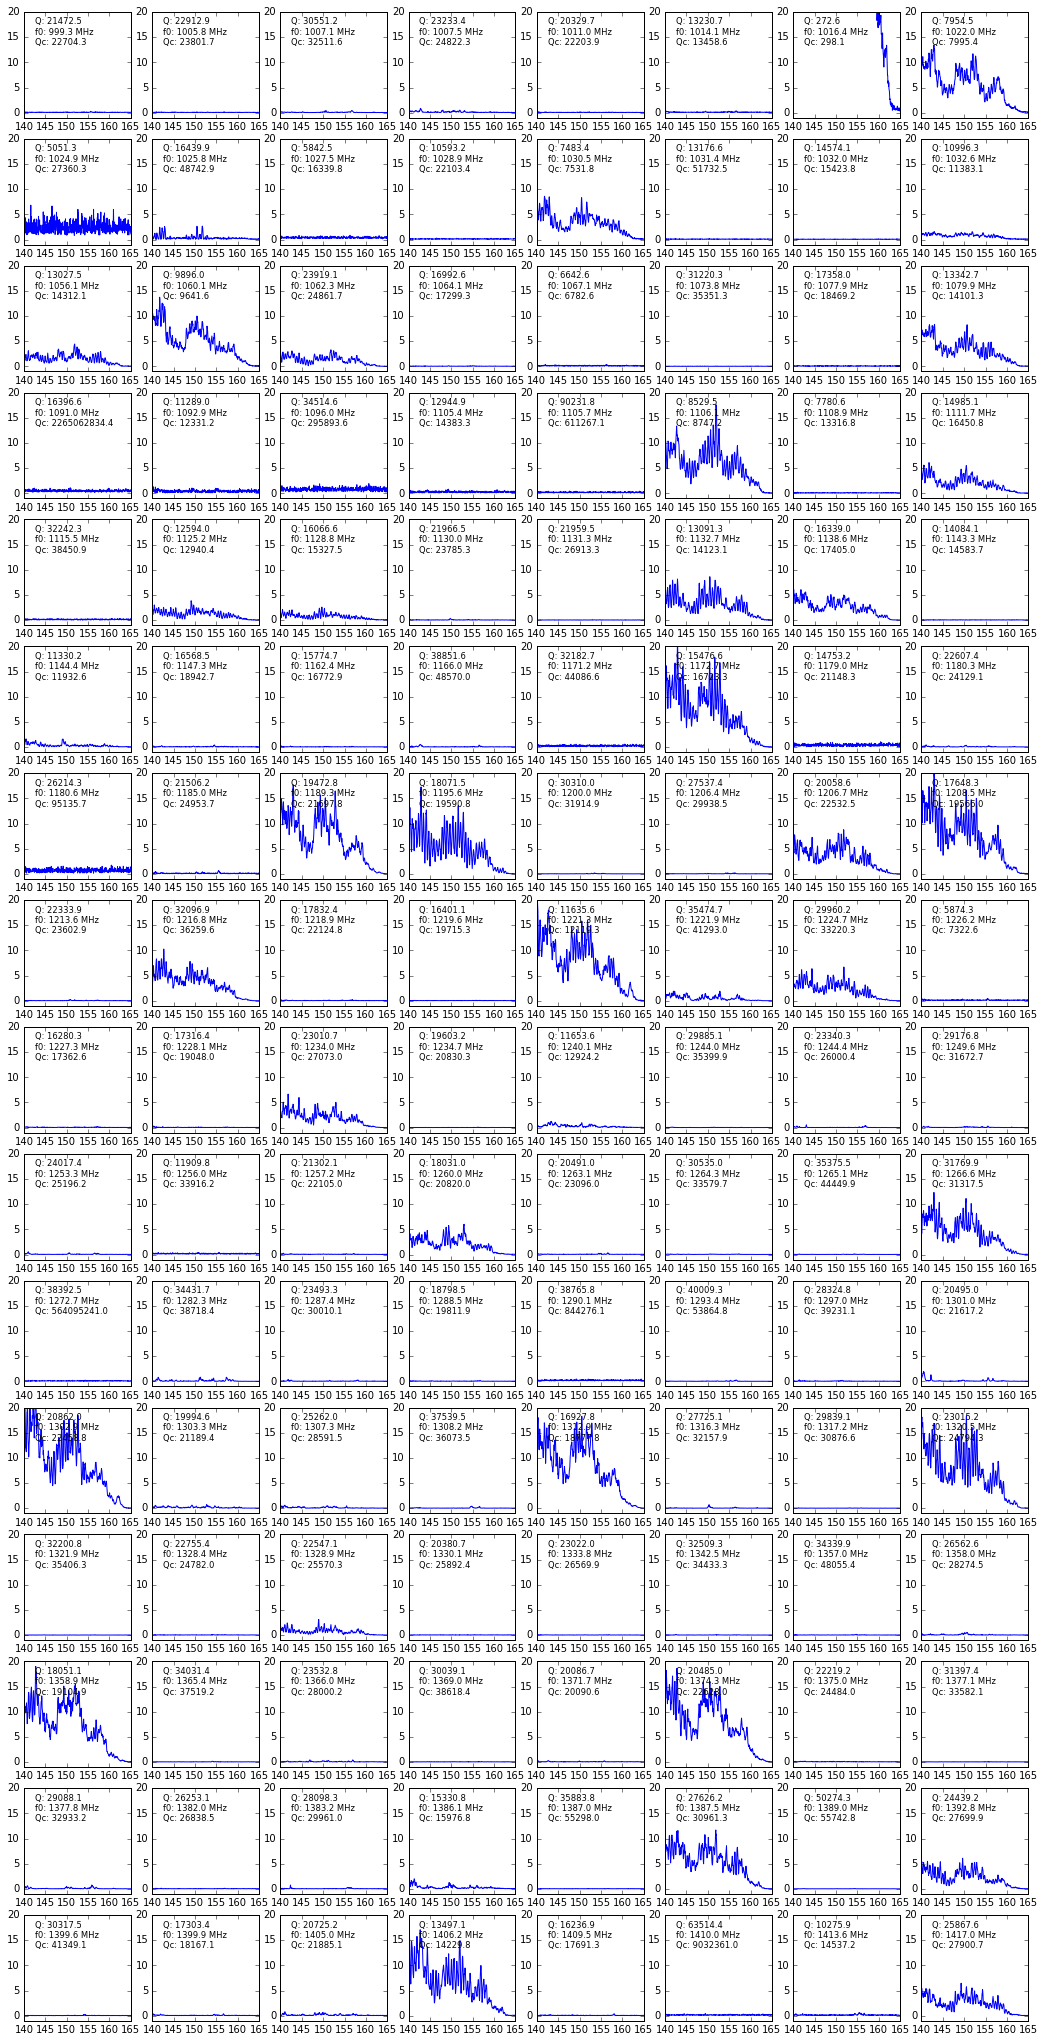

In [9]:
fig,axs = subplots(16,8,figsize=(18,36))
for k,row in df.iterrows():
    ax = axs.flatten()[k]
    try:
        ax.plot(row.mmw_frequency/1e9,1e6*row.fractional_frequency_response)
        ax.text(0.1,0.95,("Q: %.1f\nf0: %.1f MHz\nQc: %.1f" %(row.res_Q,row.res_f_0/1e6,1/np.real(1/row.res_Q_e)[()])),
               transform=ax.transAxes,size='small',va='top')
    except ValueError:
        pass
    ax.set_ylim(-1,20)

10 1016531695.78
19 1060140893.07
27 1096648846.7
36 1138601798.03
43 1171211221.92
44 1172705910.12
51 1189334477.84
56 1206722315.21
57 1208451764.91
59 1216843172.23
63 1221315435.68
87 1302896175.99
91 1312927569.91
104 1374295345.97
109 1387458606.35
116 1406167626.28


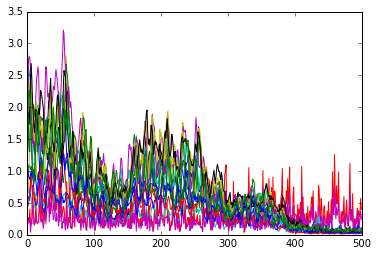

In [7]:
alive = []
for k,row in df.iterrows():
    resp = 1e6*row.fractional_frequency_response
    if np.any(resp > .75) and np.any(resp<0.1):
        plot(resp)
        print k,row.res_f_0
        alive.append(k)

In [8]:
len(alive)

16

In [28]:
df.iloc[116].res_f_0

1406097715.4760551

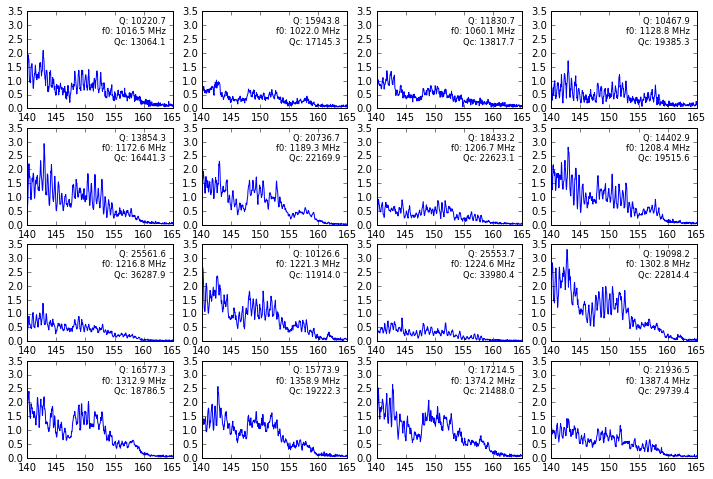

In [31]:
fig,axs = subplots(4,4,figsize=(12,8))
for idx,k in enumerate(alive):
    if idx >= np.prod(axs.shape):
        break
    ax = axs.flatten()[idx]
    row = df.iloc[k]
    ax.plot(row.mmw_frequency/1e9,1e6*row.fractional_frequency_response)
    ax.text(0.95,0.95,("Q: %.1f\nf0: %.1f MHz\nQc: %.1f" %(row.res_Q,row.res_f_0/1e6,1/np.real(1/row.res_Q_e)[()])),
               transform=ax.transAxes,size='small',va='top',ha='right')
    ax.set_ylim(0,3.5)

In [24]:
len(alive)

17

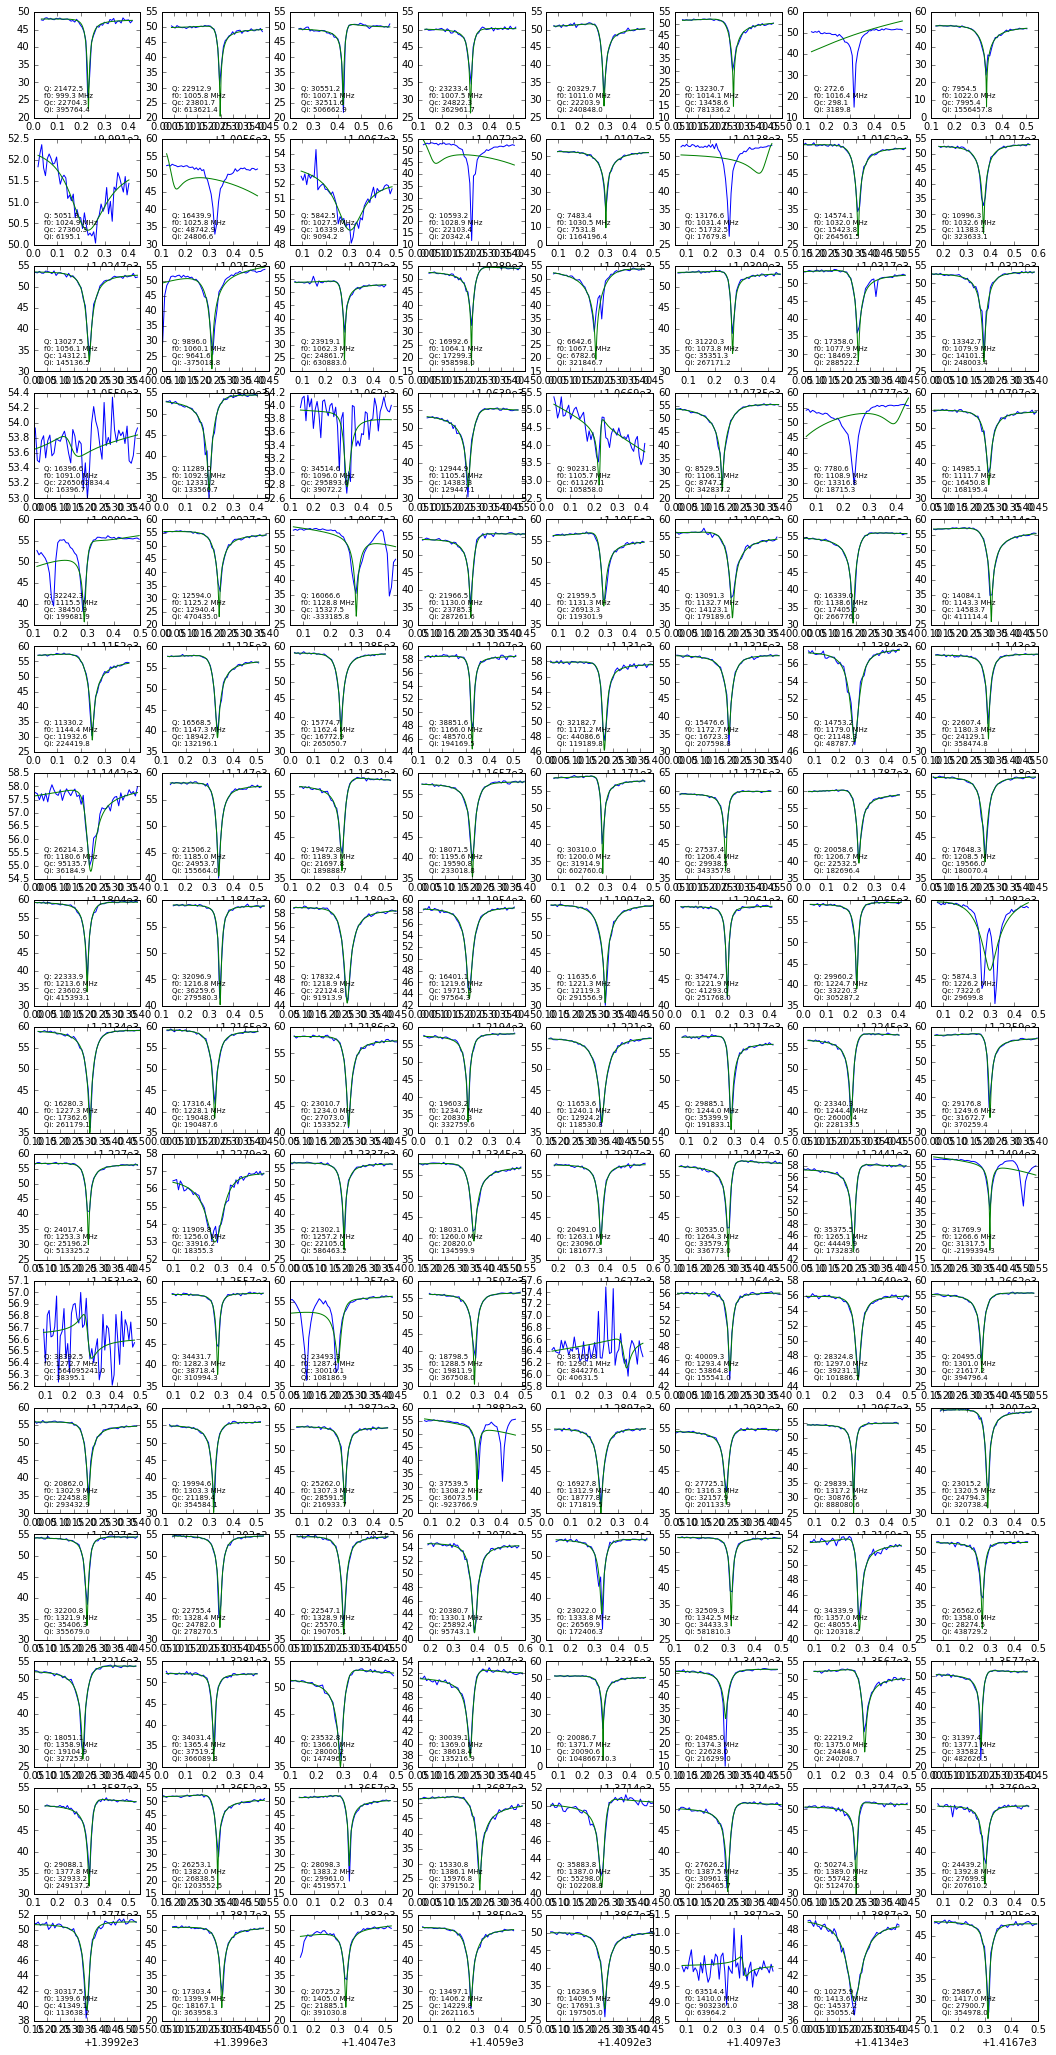

In [7]:
fig,axs = subplots(16,8,figsize=(18,36))
for k,row in df.iterrows():
    ax = axs.flatten()[k]
    try:
        ax.plot(row.res_frequency_data/1e6,20*np.log10(np.abs(row.res_s21_data)))
        ax.plot(row.res_model_frequency/1e6, 20*np.log10(np.abs(row.res_model_s21)))
        ax.text(0.1,0.05,("Q: %.1f\nf0: %.1f MHz\nQc: %.1f\nQi: %.1f" %(row.res_Q,row.res_f_0/1e6,1/np.real(1/row.res_Q_e)[()],
                         row.res_Q_i)),
               transform=ax.transAxes,size='x-small',va='bottom')
    except ValueError:
        pass


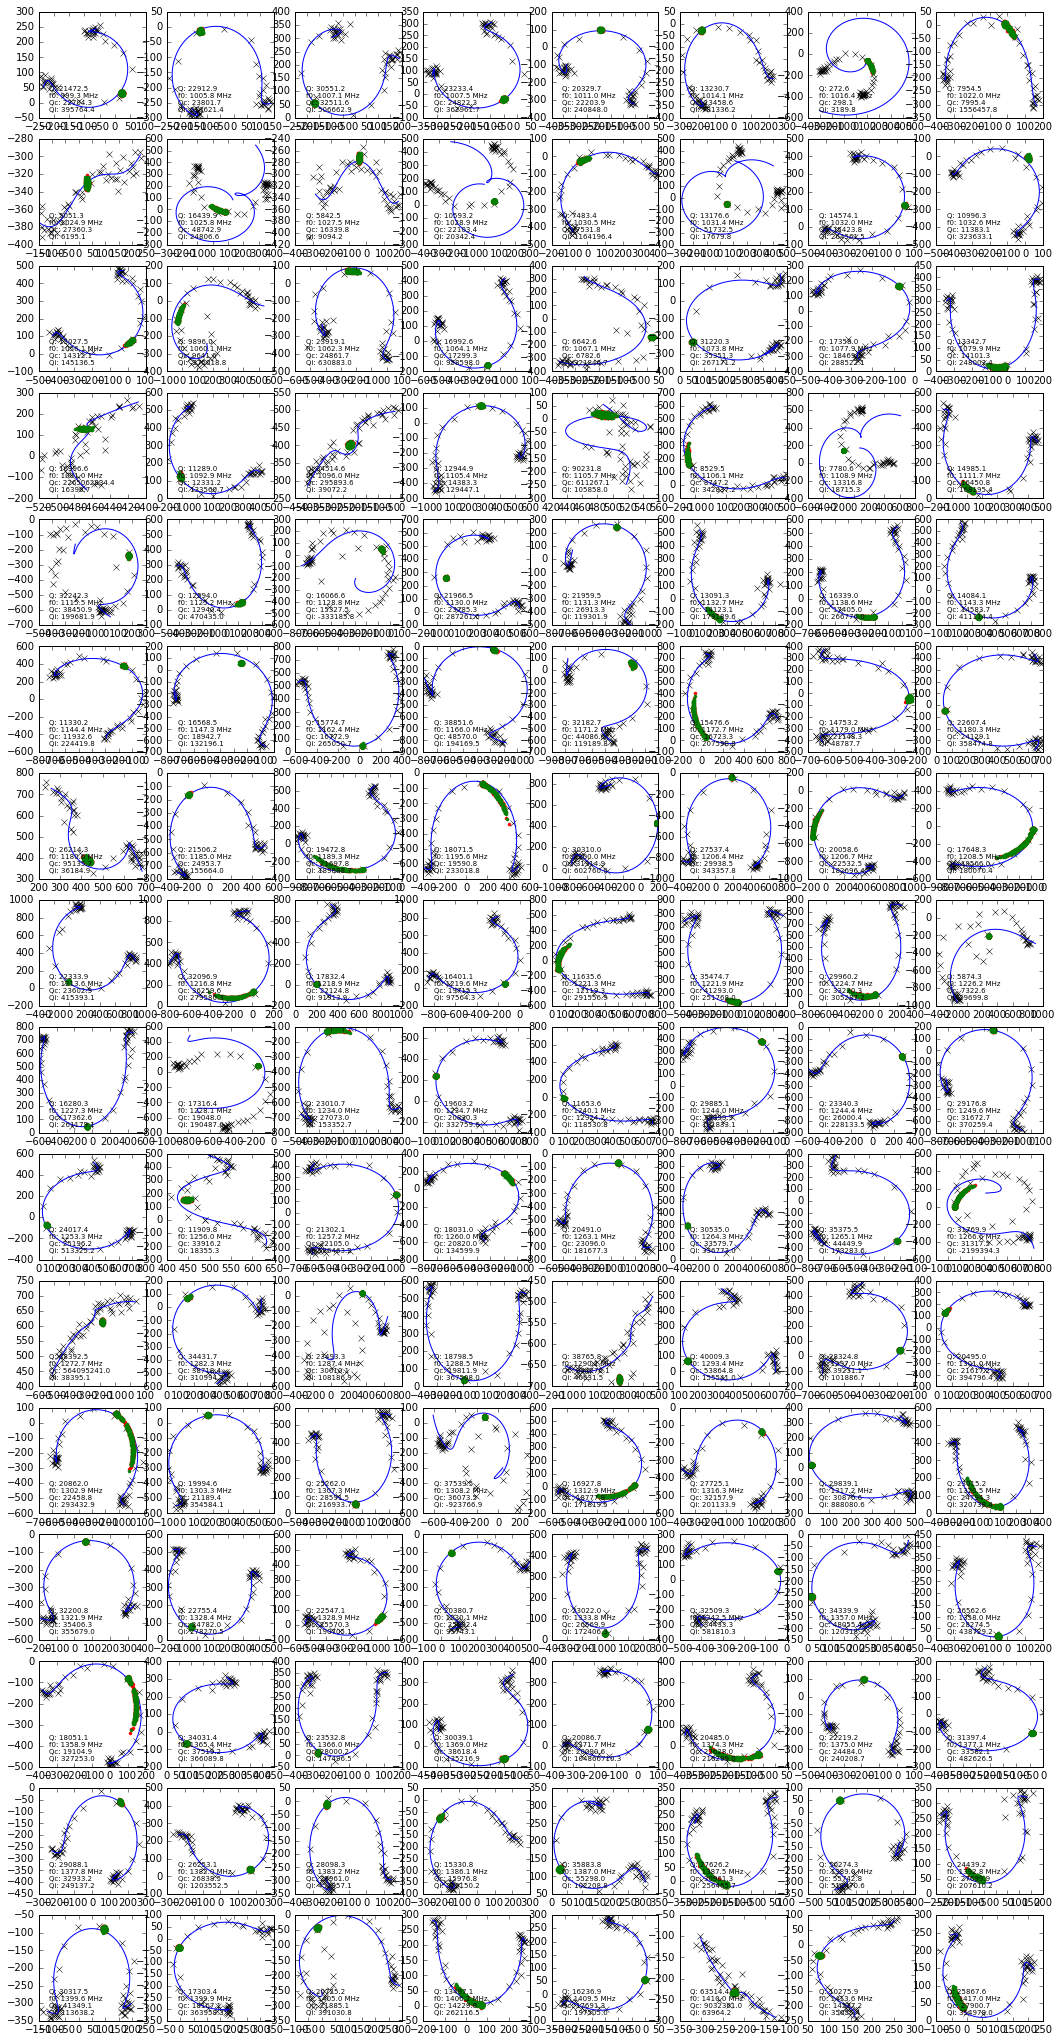

In [18]:
fig,axs = subplots(16,8,figsize=(18,36))
for k,row in df.iterrows():
    ax = axs.flatten()[k]
    try:
        plot_ri(row.res_s21_data,'kx',ax=ax)
        plot_ri(row.res_model_s21,ax=ax)
        plot_ri(row.folded_s21_raw[:,0],'r.',ax=ax)
        plot_ri(row.folded_s21_raw[:,128],'g.',ax=ax)
        
        ax.text(0.1,0.05,("Q: %.1f\nf0: %.1f MHz\nQc: %.1f\nQi: %.1f" %(row.res_Q,row.res_f_0/1e6,1/np.real(1/row.res_Q_e)[()],
                         row.res_Q_i)),
               transform=ax.transAxes,size='x-small',va='bottom')
    except ValueError:
        pass


In [8]:
3

3

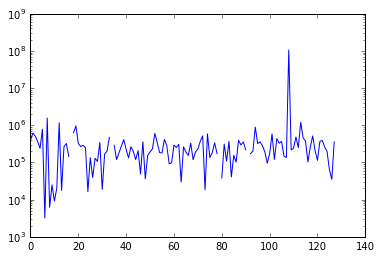

In [10]:
semilogy(df.res_Q_i)

(0.01, 50)

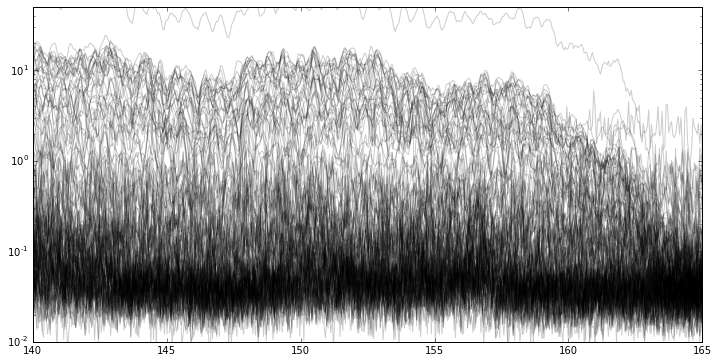

In [25]:
figure(figsize=(12,6))
for k,row in df.iterrows():
    try:
        semilogy(row.mmw_frequency/1e9,1e6*row.fractional_frequency_response,'k',alpha=.2)
    except ValueError:
        pass
xlim(140,165)
ylim(.01,50)

36


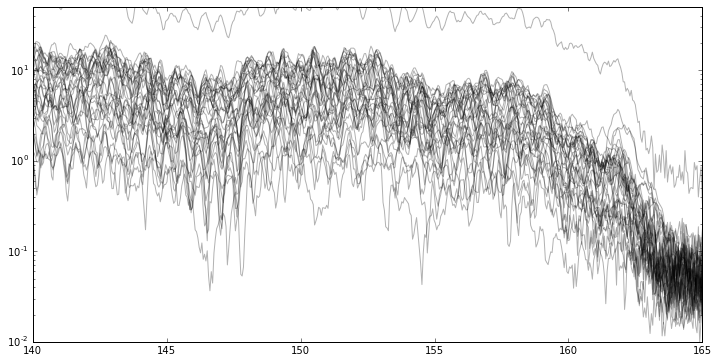

In [38]:
figure(figsize=(12,6))
num_alive = 0
for k,row in df.iterrows():
    if 1e6*np.sum(row.fractional_frequency_response)/np.sum(1e6*row.fractional_frequency_response[-20:]) > 200:
        semilogy(row.mmw_frequency/1e9,1e6*row.fractional_frequency_response,'k',alpha=.3)
        num_alive +=1
xlim(140,165)
ylim(.01,50)
print num_alive

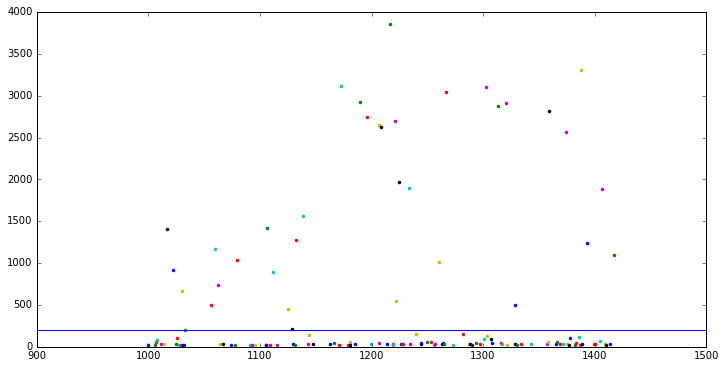

In [34]:
figure(figsize=(12,6))
for k,row in df.iterrows():
    try:
        plot(row.res_f_0/1e6,np.sum(1e6*row.fractional_frequency_response)/np.sum(1e6*row.fractional_frequency_response[-20:]),'.')
    except ValueError:
        pass
#ylim(0,5000)
axhline(200)

In [32]:
mmwr = mmwsl.single_sweep_stream_list(51)

In [37]:
swp = mmwsl.sweep.sweep(0)

In [ ]:
swp.resonator.

In [34]:
fig,axs = subplots(8,16,figsize=(36,18))
for k in range(128):
    ax = axs.flatten()[k]
    swp = mmwsl.sweep.sweep(k)
    fmodel = np.linspace(swp.frequency.min(),swp.frequency.max(),1000)
    s21model = swp.resonator.modelel.eval()
    ax.plot(swp.resonator.)
    ax.plot(swp.frequency_MHz,20*np.log10(np.abs(swp.s21_point)),'.')

In [73]:
mmwr.sweep.resonator.current_params.pretty_print()

Name         Value      Min      Max   Stderr     Vary     Expr
A_mag        591.3        0      inf     None     True     None
A_slope   -1.378e-08     -inf      inf     None     True     None
Q         2.07e+04    310.7 1.522e+05     None     True     None
Q_e_imag      9996   -1e+07    1e+07     None     True     None
Q_e_real  1.623e+04        1    1e+07     None     True     None
delay     -3.801e-07     -inf      inf     None     True     None
f_0       1.189e+09 1.189e+09 1.19e+09     None     True     None
f_min     1.189e+09     -inf      inf     None    False     None
phi          1.837   -3.142    3.142     None     True     None


In [74]:
mmwr.folded_x.shape

(50, 256)

In [170]:
ss= mmwr.sweep_stream_list[10]

In [171]:
ss.x.shape

(32768,)

In [172]:
ss.sweep.s21_point.shape

(50,)

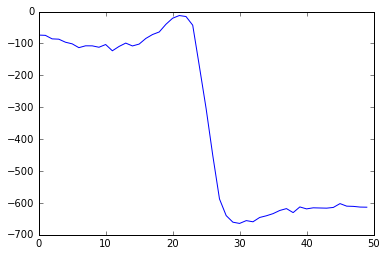

In [173]:
plot(ss.sweep.s21_point)

In [174]:
ss.sweep.s21_raw.shape

(50, 8)

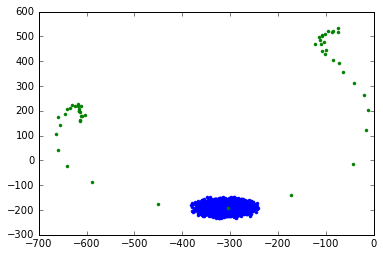

In [175]:
plot_ri(ss.stream.s21_raw,'.')
plot_ri(ss.sweep.s21_point,'.')

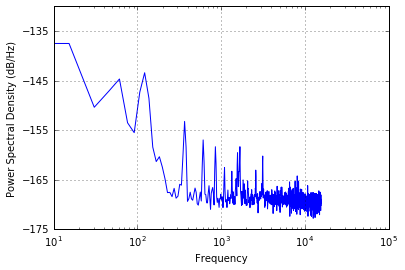

In [176]:
_ = psd(ss.x,NFFT=2048,Fs=ss.stream.stream_sample_rate)
xscale('log')

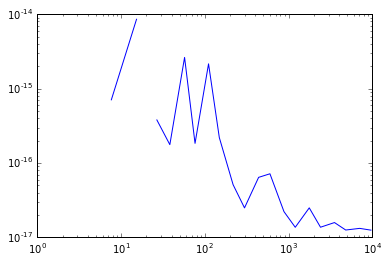

In [177]:
loglog(ss.S_frequency,ss.S_xx)

In [178]:
phase = np.arange(ss.x.shape[0])*2*np.pi/256.
stemp = np.sign(np.sin(phase))
ctemp = np.sign(np.cos(phase))


In [179]:
ss.x

array([  1.76157960e-06,   2.05301717e-06,   1.55499538e-06, ...,
         2.11158817e-06,   1.23848417e-06,   9.13149961e-07], dtype=float32)

In [180]:
ssf = np.fft.rfft(ss.x)

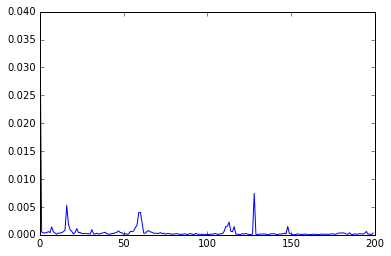

In [181]:
plot(np.abs(ssf[:200]))

In [182]:
2**15/256

128

In [196]:
np.angle(ssf[128])*128/(2*np.pi)

50.0718188958827

In [197]:
cmod = np.sum(ctemp*ss.x)
smod = np.sum(stemp*ss.x)

In [198]:
cmod,smod

(-0.0065364650942440483, -0.0050972254842851505)

In [199]:
np.angle(cmod+1j*smod)*128/(2*np.pi)

-50.507521345459161

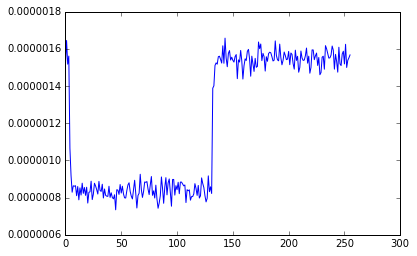

In [195]:
plot(np.roll(ss.fold(ss.x),40))

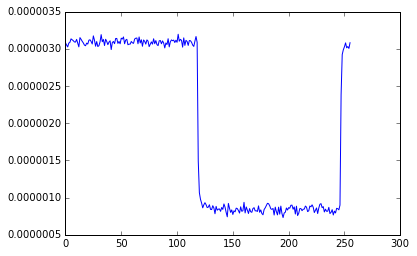

In [101]:
plot(np.roll(mmwr.folded_x[6,:],-101))

In [91]:
mmwr

AttributeError: 'MMWResponse' object has no attribute 'x'

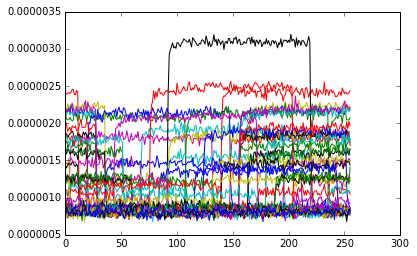

In [83]:
_=plot(mmwr.folded_x.T)

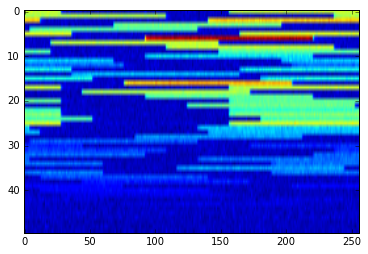

In [90]:
imshow(mmwr.folded_x,aspect='auto')